In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.metrics import mean_squared_error

In [230]:
df=pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [231]:
df.drop(['Month'],axis=1,inplace=True)

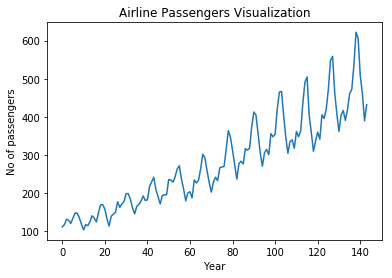

In [232]:
plt.title("Airline Passengers Visualization")
plt.xlabel("Year")
plt.ylabel("No of passengers")
plt.plot(df['#Passengers'])
plt.show()

In [233]:
scaler=MinMaxScaler()
df=scaler.fit_transform(df)
df.max()

/home/yash/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1.0

In [234]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [235]:
def get_data(array,look_back):
    x=[]
    y=[]
    for i in range(len(array)-look_back):
        x.append(array[i])
        y.append(array[i+look_back])
    return x,y

In [236]:
x,y=get_data(df,1)

In [237]:
x

[array([0.01544402]),
 array([0.02702703]),
 array([0.05405405]),
 array([0.04826255]),
 array([0.03281853]),
 array([0.05984556]),
 array([0.08494208]),
 array([0.08494208]),
 array([0.06177606]),
 array([0.02895753]),
 array([0.]),
 array([0.02702703]),
 array([0.02123552]),
 array([0.04247104]),
 array([0.07142857]),
 array([0.05984556]),
 array([0.04054054]),
 array([0.08687259]),
 array([0.12741313]),
 array([0.12741313]),
 array([0.1042471]),
 array([0.05598456]),
 array([0.01930502]),
 array([0.06949807]),
 array([0.07915058]),
 array([0.08880309]),
 array([0.14285714]),
 array([0.11389961]),
 array([0.13127413]),
 array([0.14285714]),
 array([0.18339768]),
 array([0.18339768]),
 array([0.15444015]),
 array([0.11196911]),
 array([0.08108108]),
 array([0.11969112]),
 array([0.12934363]),
 array([0.14671815]),
 array([0.17181467]),
 array([0.14864865]),
 array([0.15250965]),
 array([0.22007722]),
 array([0.24324324]),
 array([0.26640927]),
 array([0.2027027]),
 array([0.16795367])

In [238]:
y

[array([0.02702703]),
 array([0.05405405]),
 array([0.04826255]),
 array([0.03281853]),
 array([0.05984556]),
 array([0.08494208]),
 array([0.08494208]),
 array([0.06177606]),
 array([0.02895753]),
 array([0.]),
 array([0.02702703]),
 array([0.02123552]),
 array([0.04247104]),
 array([0.07142857]),
 array([0.05984556]),
 array([0.04054054]),
 array([0.08687259]),
 array([0.12741313]),
 array([0.12741313]),
 array([0.1042471]),
 array([0.05598456]),
 array([0.01930502]),
 array([0.06949807]),
 array([0.07915058]),
 array([0.08880309]),
 array([0.14285714]),
 array([0.11389961]),
 array([0.13127413]),
 array([0.14285714]),
 array([0.18339768]),
 array([0.18339768]),
 array([0.15444015]),
 array([0.11196911]),
 array([0.08108108]),
 array([0.11969112]),
 array([0.12934363]),
 array([0.14671815]),
 array([0.17181467]),
 array([0.14864865]),
 array([0.15250965]),
 array([0.22007722]),
 array([0.24324324]),
 array([0.26640927]),
 array([0.2027027]),
 array([0.16795367]),
 array([0.13127413])

In [239]:
x=np.array(x)
x=x.reshape(-1,1)
y=np.array(y)
y.reshape(-1,1)

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374517],
       [0.177

In [240]:
x.shape

(143, 1)

In [241]:
y.shape

(143, 1)

In [242]:
x_train=x[0:100]
y_train=y[0:100]
x_test=x[100:143]
y_test=y[100:143]

In [243]:
x_train.shape

(100, 1)

In [244]:
x_test.shape

(43, 1)

In [245]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [246]:
x_train.shape

(100, 1, 1)

In [247]:
model=Sequential()
model.add(LSTM(3,input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [248]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 3)                 60        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [249]:
model.fit(x_train,y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20
100/100 [==============================] - 4s 36ms/sample - loss: 0.0327
Epoch 2/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0145
Epoch 3/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0114
Epoch 4/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0104
Epoch 5/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0093
Epoch 6/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0084
Epoch 7/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0075
Epoch 8/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0065
Epoch 9/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0057
Epoch 10/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0050
Epoch 11/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0042
Epoch 12/20
100/100 [==============================] - 1s 6ms/sample - loss: 0.0037


In [250]:
y_pred=model.predict(x.reshape(x.shape[0],x.shape[1],1))

In [251]:
y_pred

array([[0.04744023],
       [0.0567076 ],
       [0.07870701],
       [0.07394953],
       [0.06137799],
       [0.08348756],
       [0.10446303],
       [0.10446303],
       [0.08508616],
       [0.0582617 ],
       [0.03523916],
       [0.0567076 ],
       [0.05206159],
       [0.06921544],
       [0.09311679],
       [0.08348756],
       [0.06764265],
       [0.10609356],
       [0.14086707],
       [0.14086707],
       [0.12087417],
       [0.08029798],
       [0.05051838],
       [0.09150568],
       [0.09958579],
       [0.10772648],
       [0.15436786],
       [0.12916584],
       [0.14422968],
       [0.15436786],
       [0.19041291],
       [0.19041291],
       [0.1645795 ],
       [0.12750304],
       [0.10120912],
       [0.13416758],
       [0.1425473 ],
       [0.1577637 ],
       [0.18002903],
       [0.15946463],
       [0.16287255],
       [0.22370641],
       [0.24502744],
       [0.26655015],
       [0.20786087],
       [0.17658247],
       [0.14422968],
       [0.181

In [252]:
y_pred=scaler.inverse_transform(y_pred)

In [253]:
y_pred

array([[128.57404],
       [133.37453],
       [144.77023],
       [142.30586],
       [135.79381],
       [147.24655],
       [158.11185],
       [158.11185],
       [148.07463],
       [134.17955],
       [122.25388],
       [133.37453],
       [130.9679 ],
       [139.85359],
       [152.2345 ],
       [147.24655],
       [139.0389 ],
       [158.95647],
       [176.96915],
       [176.96915],
       [166.61281],
       [145.59435],
       [130.16852],
       [151.39993],
       [155.58545],
       [159.80232],
       [183.96255],
       [170.90791],
       [178.71097],
       [183.96255],
       [202.63388],
       [202.63388],
       [189.25218],
       [170.04657],
       [156.42633],
       [173.49881],
       [177.83951],
       [185.7216 ],
       [197.25504],
       [186.60268],
       [188.36798],
       [219.87993],
       [230.92422],
       [242.07298],
       [211.67194],
       [195.46973],
       [178.71097],
       [198.14915],
       [199.94022],
       [199.94022],


In [254]:
x=scaler.inverse_transform(x)

In [255]:
x

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

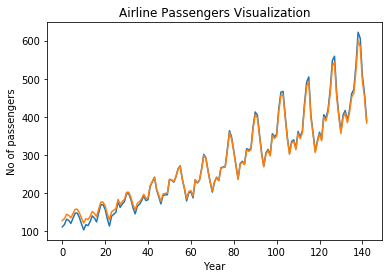

In [256]:
plt.title("Airline Passengers Visualization")
plt.xlabel("Year")
plt.ylabel("No of passengers")
plt.plot(x)
plt.plot(y_pred)
plt.show()